# RBE/CS549 Fall 2022: Computer Vision
## Homework 0: Alohomora

Author(s): 
Prof. Nitin J. Sanket (nsanket@wpi.edu), Lening Li (lli4@wpi.edu), Gejji, Vaishnavi Vivek (vgejji@wpi.edu)

Robotics Engineering Department,

Worcester Polytechnic Institute

Code adapted from CMSC733 at the University of Maryland, College Park.


## Phase 1




### Get the BSDS500 dataset

In [ ]:
!wget https://raw.githubusercontent.com/leelening/rbe549/main/hw0/BSDS500.tar.xz
!tar -xvf BSDS500.tar.xz
!mv BSDS500/ /content/data/

--2023-01-19 08:11:04--  https://raw.githubusercontent.com/leelening/rbe549/main/hw0/BSDS500.tar.xz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 812060 (793K) [application/octet-stream]
Saving to: ‘BSDS500.tar.xz.2’

BSDS500.tar.xz.2    100%[===================>] 793.03K  --.-KB/s    in 0.05s   

2023-01-19 08:11:04 (16.4 MB/s) - ‘BSDS500.tar.xz.2’ saved [812060/812060]

BSDS500/
BSDS500/CannyBaseline/
BSDS500/CannyBaseline/1.png
BSDS500/CannyBaseline/10.png
BSDS500/CannyBaseline/2.png
BSDS500/CannyBaseline/3.png
BSDS500/CannyBaseline/4.png
BSDS500/CannyBaseline/5.png
BSDS500/CannyBaseline/6.png
BSDS500/CannyBaseline/7.png
BSDS500/CannyBaseline/8.png
BSDS500/CannyBaseline/9.png
BSDS500/GroundTruth/
BSDS500/GroundTruth/1.png
BSDS500/GroundTruth/10.png
BSDS

In [ ]:
!wget https://raw.githubusercontent.com/leelening/rbe549/main/hw0/TxtFiles.tar.xz
!tar -xvf TxtFiles.tar.xz
!mv TxtFiles/ /content/data/

--2023-01-19 08:11:05--  https://raw.githubusercontent.com/leelening/rbe549/main/hw0/TxtFiles.tar.xz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55376 (54K) [application/octet-stream]
Saving to: ‘TxtFiles.tar.xz.2’

TxtFiles.tar.xz.2   100%[===================>]  54.08K  --.-KB/s    in 0.01s   

2023-01-19 08:11:05 (4.74 MB/s) - ‘TxtFiles.tar.xz.2’ saved [55376/55376]

TxtFiles/
TxtFiles/DirNamesTest.txt
TxtFiles/DirNamesTrain.txt
TxtFiles/LabelsTest.txt
TxtFiles/LabelsTrain.txt
mv: cannot move 'TxtFiles/' to '/content/data/TxtFiles': Directory not empty


In [ ]:
import numpy as np
import cv2
import glob
import math
import matplotlib.pyplot as plt
from scipy.ndimage import rotate
from sklearn.cluster import KMeans

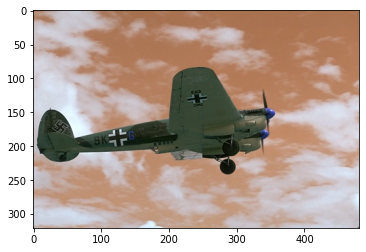

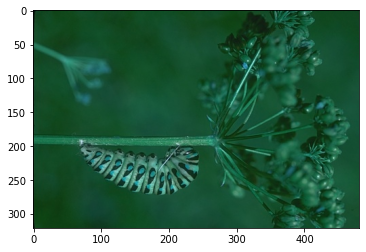

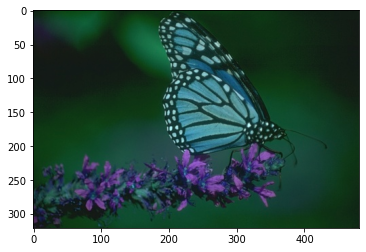

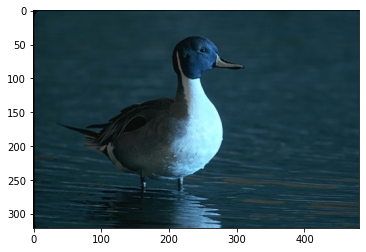

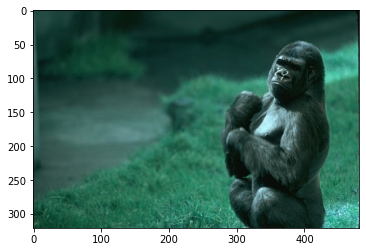

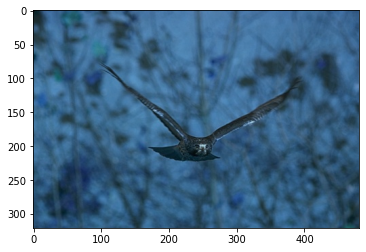

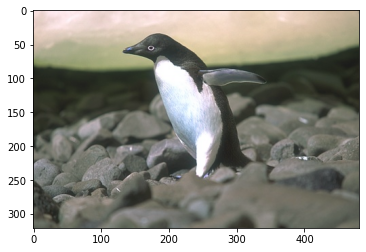

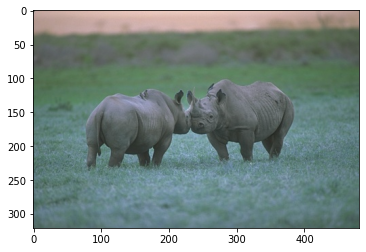

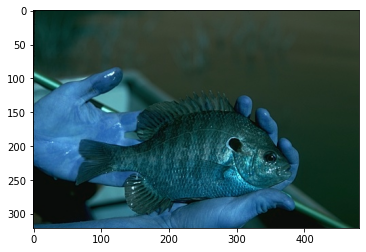

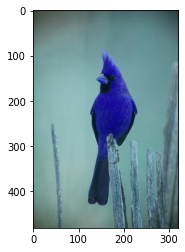

In [ ]:
#Importing all the input images

in_imageslist = []
images_path=[]# glob.glob("content/data/BSDS500/Images/*.jpg")
for i in range(10):
  images_path.append("/content/data/Images/"+str(i+1)+".jpg")
for n in images_path:
  images = cv2.imread(n)
  # print(images.shape)
  in_imageslist.append(images)
  plt.imshow(images)
  plt.show()

In [ ]:
# Normalization

def normalize(image):
    return cv2.normalize(image,dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)

1. Generate Difference of Gaussian Filter Bank: (DoG)
2. Display all the filters in this filter bank and save image as DoG.png,
3. use command "cv2.imwrite(...)"

In [ ]:
#Gaussian filter generation

def gaussfilter(size, sigma_x, sigma_y):
  s = int((size-1)/2)
  x, y = np.mgrid[-s:s+1,-s:s+1]
  gauss_filter = np.exp(-(x**2/(2 * sigma_x**2) + y**2/(2 * sigma_y**2)))/(2 * np.pi * sigma_x * sigma_y)
  return gauss_filter

In [ ]:
#Oriented DoG Filter

def DoGfilter(orientation, scale):
  Sx = np.matrix([[-1, 0, 1],[-2, 0, 2], [-1, 0, 1]])
  Sy = np.matrix([[1, 2, 1],[0, 0, 0], [-1, -2, -1]])
  size=17
  DoG_filter = []
  for sigma in scale:
    kernel = gaussfilter(size, sigma, sigma)
    Gy = cv2.filter2D(kernel, -1, Sy)
    DoG=Gy
    for num in range(orientation):
      Orient = rotate(DoG,360*num/orientation)
      DoG_filter.append(Orient)
  return DoG_filter

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

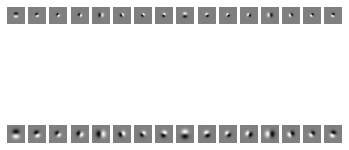

In [ ]:
scale=np.array([1,2])
orientation=16
DoGfilter_output = DoGfilter(orientation, scale)
for i in range(0,32):
  plt.subplot(2,16,i+1,)
  plt.axis('off')
  plt.imshow(DoGfilter_output[i], cmap = 'gray')
plt.savefig('DoG.png')


1. Generate Leung-Malik Filter Bank: (LM)
2. Display all the filters in this filter bank and save image as LM.png,
3. use command "cv2.imwrite(...)"


In [ ]:
# First and Second Derivative

def Der1_Gaussian(orientation, scale):
  Sx = np.matrix([[-1, 0, 1],[-2, 0, 2], [-1, 0, 1]])
  Sy = np.matrix([[1, 2, 1],[0, 0, 0], [-1, -2, -1]])
  size=33
  Der1_filter = []
  for i in range(len(scale)):
    kernel = gaussfilter(size, scale[i], 3*scale[i])
    Gy1 = cv2.filter2D(kernel, -1, Sy)
    DoG1= Gy1
    
    for num in range(orientation):
      Orient1 = rotate(DoG1,180*num/orientation)
      Der1_filter.append(Orient1)
  return Der1_filter

def Der2_Gaussian(orientation, scale):
  Sx = np.matrix([[-1, 0, 1],[-2, 0, 2], [-1, 0, 1]])
  Sy = np.matrix([[1, 2, 1],[0, 0, 0], [-1, -2, -1]])
  size=33
  Der2_filter = []
  for i in range(len(scale)):
    kernel = gaussfilter(size, scale[i], 3*scale[i])
    Gy1 = cv2.filter2D(kernel, -1, Sy)
    DoG1= Gy1
    Gy2 = cv2.filter2D(DoG1, -1, Sy)
    DoG2= Gy2
    for num in range(orientation):
      Orient1 = rotate(DoG2,180*num/orientation)
      Der2_filter.append(Orient1)
  return Der2_filter


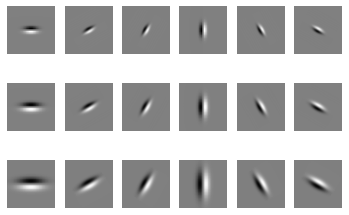

In [ ]:
scale=np.array([1, math.sqrt(2), 2])
orientation=6
Der1_Gauss_output = Der1_Gaussian(orientation, scale)
# print(len(Der1_Gauss_output))
for i in range(0,18):
  plt.subplot(3,6,i+1)
  plt.axis('off')
  plt.imshow(Der1_Gauss_output[i], cmap = 'gray')


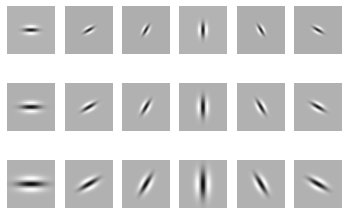

In [ ]:
scale=np.array([1, math.sqrt(2), 2])
orientation=6
Der2_Gauss_output = Der2_Gaussian(orientation, scale)
# print(len(Der2_Gauss_output))
for i in range(0,18):
  plt.subplot(3,6,i+1)
  plt.axis('off')
  plt.imshow(Der2_Gauss_output[i], cmap = 'gray')

In [ ]:
# LoG

def LoG(scale):
  Lkernel = np.matrix([[0, 1, 0],[1, -4, 1], [0, 1, 0]])
  size=89
  LoG_filter=[]
  for i in range(len(scale)):
    kernel = gaussfilter(size, scale[i], scale[i])
    LoG_output = cv2.filter2D(kernel, -1, Lkernel)
    LoG_filter.append(LoG_output)
  return LoG_filter

In [ ]:
#Gaussian Filter

def Gauss(scale):
  size=33
  gauss=[]
  for i in range(len(scale)):
    kernel = gaussfilter(size, scale[i], scale[i])
    gauss.append(kernel)
  return gauss

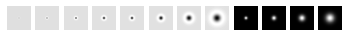

In [ ]:
scale=np.array([1, math.sqrt(2), 2, 2*math.sqrt(2)])
scale=np.array([math.sqrt(2), 2, math.sqrt(2)*2,4])
LoG_output=LoG(scale)+LoG(scale*3)
gauss_output=Gauss(scale)
Output= LoG_output + gauss_output
# print(len(Output))
for i in range(0,12):
  plt.subplot(1,12,i+1)
  plt.axis('off')
  plt.imshow(Output[i], cmap = 'gray')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

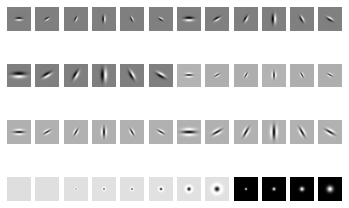

In [ ]:
scaleS=np.array([1, math.sqrt(2), 2, 2*math.sqrt(2)])
scaleL=np.array([math.sqrt(2), 2, math.sqrt(2)*2,4])
orientation=6
Der1_Gauss_output = Der1_Gaussian(orientation, scaleS[0:3])
Der2_Gauss_output = Der2_Gaussian(orientation, scaleS[0:3])
LoG_output=LoG(scaleS)+LoG(scaleS*3)
gauss_output=Gauss(scaleS)
Output= LoG_output + gauss_output
LMS=Der1_Gauss_output+Der2_Gauss_output+Output
# print(len(LMS))
Der1_Gauss_output = Der1_Gaussian(orientation, scaleL[0:3])
Der2_Gauss_output = Der2_Gaussian(orientation, scaleL[0:3])
LoG_output=LoG(scaleL)+LoG(scaleL*3)
gauss_output=Gauss(scaleL)
Output= LoG_output + gauss_output
LML=Der1_Gauss_output+Der2_Gauss_output+Output
# print(len(LML))
LM=LMS+LML
# print(len(LM))
for i in range(48):
  plt.subplot(4,12,i+1)
  plt.axis('off')
  plt.imshow(LMS[i], cmap = 'gray')
plt.savefig('LMS.png')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

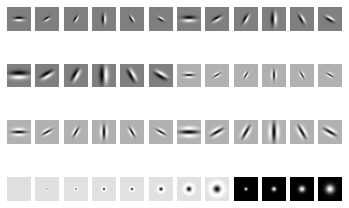

In [ ]:
for i in range(48):
  plt.subplot(4,12,i+1)
  plt.axis('off')
  plt.imshow(LML[i], cmap = 'gray')
plt.savefig('LML.png')


1. Generate Gabor Filter Bank: (Gabor)
2. Display all the filters in this filter bank and save image as Gabor.png,
3. use command "cv2.imwrite(...)"


In [ ]:
#Gabor Filter

def Gaborfilter(sigma, theta, Lambda, psi, gamma, size):
  total_s = len(sigma)
  total_o = len(theta)
  Gabor_Filter=[]
  for i in range(total_s):
    for j in range((total_o)):
      sigma_x = sigma[i]
      sigma_y = float(sigma[i]) / gamma
      s = int((size-1)/2)
      (y, x) = np.meshgrid(np.arange(-1*s, s + 1), np.arange(-1*s, s + 1))
      theta_x = x * np.cos(theta[j]) + y * np.sin(theta[j])
      theta_y = -x * np.sin(theta[j]) + y * np.cos(theta[j])

      gabor = np.exp(-0.5 * ((theta_x**2)/(sigma_x**2) + (theta_y**2)/(sigma_y**2))) * np.cos((2 * np.pi*theta_x) / Lambda + psi)
      tmp = gabor
      tmp = tmp - np.min(tmp)*np.ones(np.shape(tmp))
      tmp = tmp/np.max(tmp)
      
      Gabor_Filter.append(tmp)
  return Gabor_Filter

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

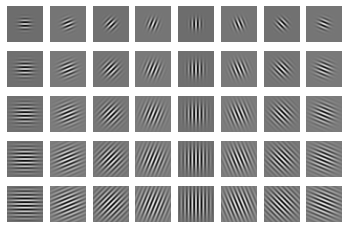

In [ ]:
sigma = np.array([5,7,9,11,13])
theta = np.arange(0,np.pi,np.pi/8)
Lambda = 5
psi = 0
gamma = 1
size=49
Gaborfilter_output = Gaborfilter(sigma, theta, Lambda, psi, gamma, size)
# n=len(Gaborfilter_output)
# print(n)
for i in range(40):
  plt.subplot(5,8,i+1)
  plt.axis('off')
  plt.imshow(Gaborfilter_output[i], cmap = 'gray')
plt.savefig('Gabor.png')

1. Generate Half-disk masks
2. Display all the Half-disk masks and save image as HDMasks.png,
3. use command "cv2.imwrite(...)"

In [ ]:
#Half Disk Masking

def Halfdisk(radius,orientation):
  size = 2*radius + 1
  halfd = np.zeros([size, size])
  for r in range(radius):
      for s in range(size):
        if (np.square(r-radius) + np.square(s-radius) <= (radius*radius)):
          halfd[r,s] = 1
  return halfd

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

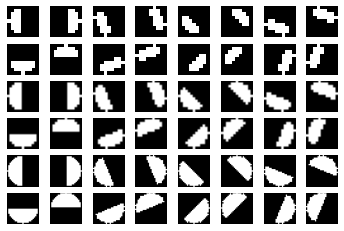

In [ ]:
radius = np.array([4,6,12])
orientation = np.arange(90,270, 180/8)
HD1=[]
HDL=[]
HDR=[]
for i in range(len(radius)):
  halfdisk_output = Halfdisk(radius[i],orientation)
  for j in range(len(orientation)):
    disk1 = rotate(halfdisk_output, orientation[j], reshape=False, order=0)
    HD1.append(disk1)
    HDL.append(disk1)
    disk2 = rotate(halfdisk_output, orientation[j]+180, reshape=False, order=0)
    # disk2 = rotate(disk1,180)
    HD1.append(disk2)
    HDR.append(disk2)
for i in range(len(HD1)):
  plt.subplot(6,8,i+1)
  plt.axis('off')
  plt.imshow(HD1[i], cmap = 'gray')
plt.savefig('HDMasks.png')


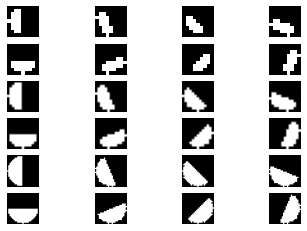

In [ ]:
# For Pair of half disks

for j in range(len(HDL)):
  plt.subplot(6,4,j+1)
  plt.axis('off')
  plt.imshow(HDL[j], cmap = 'gray')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

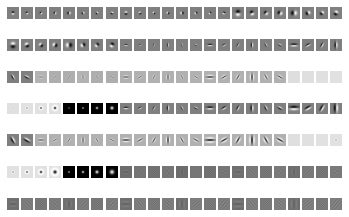

In [ ]:
# Generation of Filter Banks

filter_banks=DoGfilter_output+LMS+LML+Gaborfilter_output
# print(len(filter_banks))
# print(len(DoGfilter_output))
# plt.figure()
for j in range(len(filter_banks)):
  plt.subplot(7,24,j+1)
  plt.axis('off')
  plt.imshow(filter_banks[j], cmap = 'gray')
plt.savefig('Filter_Bank.png')

1. Generate Texton Map
2. Filter image using oriented gaussian filter bank


In [ ]:
# Applying Filter bank on image

def Filter_img(image):
  filter_img=[]
  gray=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  for flt in filter_banks:
    tmp=cv2.filter2D(gray,-1,flt)
    filter_img.append(tmp)
  return filter_img


In [ ]:
##Test

image=cv2.imread("/content/data/Images/8.jpg")
fi=Filter_img(image)
fi=np.array(fi)
print(fi.shape)


(168, 321, 481)


1. Generate texture ID's using K-means clustering
2. Display texton map and save image as TextonMap_ImageName.png,
3. use command "cv2.imwrite('...)"


In [ ]:
# Texton Map

def textonmap(image):
  fimage=Filter_img(image)
  fimage=np.array(fimage)
  total_filter,H,W =fimage.shape
  reshaped_mtx=fimage.reshape([total_filter,H*W])
  reshaped_mtx=reshaped_mtx.T
  Kmeans_T = KMeans(n_clusters = 64,init='random', n_init = 2).fit(reshaped_mtx)
  labels = Kmeans_T.labels_
  texton_map = np.reshape(labels, (H,W))
  return texton_map


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

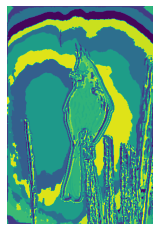

In [ ]:
texton_map=[]
for image in in_imageslist:
  tm=textonmap(image)
  texton_map.append(tm)
for i in range(len(texton_map)):
  plt.imshow(texton_map[i])
    # plt.show()
  plt.axis('off')
  plt.savefig('TextonMap_{}'.format(i+1) + '.png')


1. Generate Brightness Map
2. Perform brightness binning


In [ ]:
# Brightness Map

def brightmap(image):
    image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    H,W = image.shape
    reshaped_mtx=image.reshape([H*W,1])
    Kmeans_T = KMeans(n_clusters = 16,init='random', n_init = 2).fit(reshaped_mtx)
    labels = Kmeans_T.labels_
    bright_map = np.reshape(labels, (H,W))
    return bright_map

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

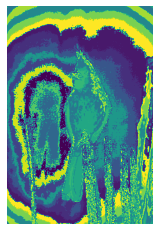

In [ ]:
brightness_map=[]
for image in in_imageslist:
  bm=brightmap(image)
  brightness_map.append(bm)
for i in range(len(brightness_map)):
  plt.imshow(brightness_map[i])
    # plt.show()
  plt.axis('off')
  plt.savefig('BrightnessMap_{}'.format(i+1)+ '.png')
  

1. Generate Color Map
2. Perform color binning or clustering


In [ ]:
# Color Map

def colormap(image):
  H,W,value_pixel = image.shape
  reshaped_mtx=image.reshape((H*W,value_pixel))
  Kmeans_T = KMeans(n_clusters = 16,init='random', n_init = 2).fit(reshaped_mtx)
  labels = Kmeans_T.labels_
  color_map = np.reshape(labels, (H,W))
  return color_map

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

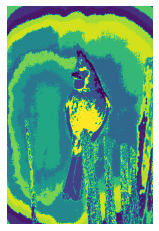

In [ ]:
color_map=[]
for image in in_imageslist:
  cm=colormap(image)
  color_map.append(cm)
for i in range(len(color_map)):
  plt.imshow(color_map[i])
  plt.axis('off')
  # plt.show()
  plt.savefig('ColorMap_{}'.format(i+1)+ '.png')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

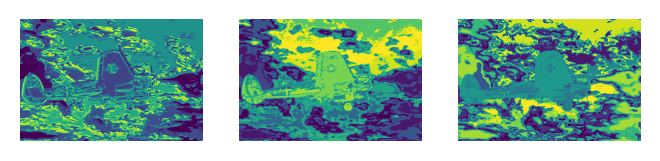

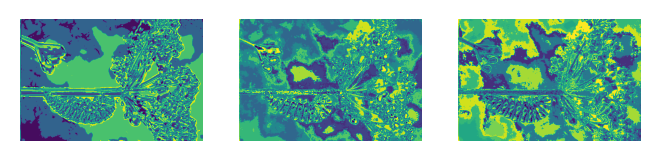

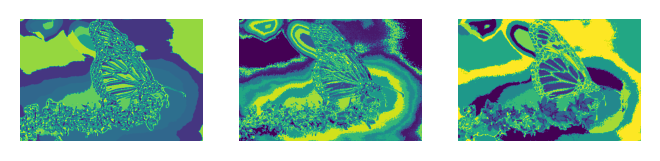

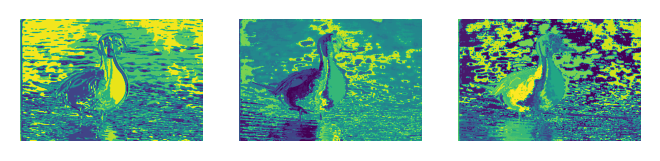

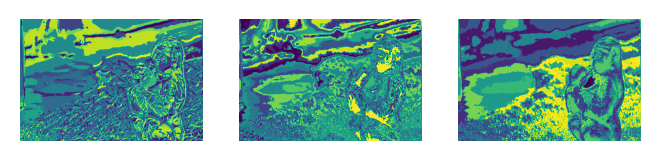

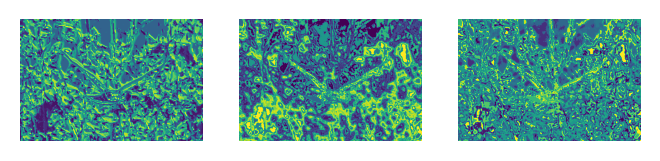

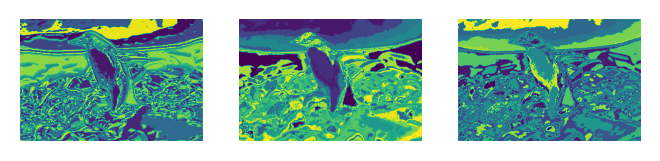

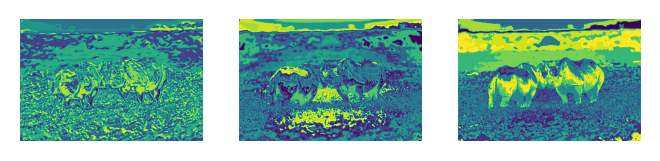

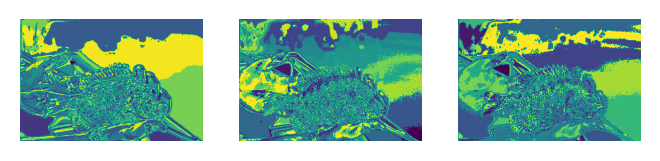

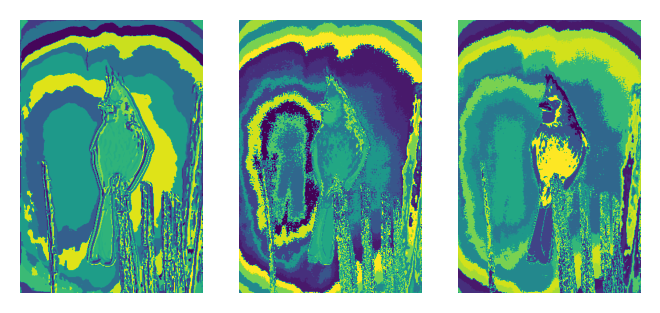

In [ ]:
# Maps for all the images

for i in range(len(texton_map)):
  plt.figure(figsize=(4,4),dpi=200)
  plt.subplot(1,3,1)
  plt.axis('off')
  plt.imshow(texton_map[i])
  plt.subplot(1,3,2)
  plt.axis('off')
  plt.imshow(brightness_map[i])
  plt.subplot(1,3,3)
  plt.axis('off')
  plt.imshow(color_map[i])
  # plt.show()
  plt.savefig('Map_{}'.format(i+1)+ '.png')


1. Generate Brightness Gradient (Bg)
2. Perform Chi-square calculation on Brightness Map
3. Display Bg and save image as Bg_ImageName.png,
4. use command "cv2.imwrite(...)"






1. Generate Color Gradient (Cg)
2. Perform Chi-square calculation on Color Map
3. Display Cg and save image as Cg_ImageName.png,
4. use command "cv2.imwrite(...)"



1. Generate Texton Gradient (Tg)
2. Perform Chi-square calculation on Texton Map
3. Display Tg and save image as Tg_ImageName.png,
4. use command "cv2.imwrite(...)"


In [ ]:
#Chi-square distance calculation

def chi_square(image_map,HDL,HDR,bin):
  chi_squared=[]
  for k in range(len(HDL)):
    chi_sqr_dist = np.zeros(image_map.shape)
    tmp = np.zeros(image_map.shape)
    for i in range (bin):
      tmp[image_map == i] = 1.0
      mask = tmp.astype(float)
      g_i = cv2.filter2D(mask,-1,HDL[k])
      h_i = cv2.filter2D(mask,-1,HDR[k])
      chi_sqr_dist += (np.power((g_i-h_i),2)/(g_i+h_i+np.exp(-7)))
    chi_squared.append(chi_sqr_dist)
  Chi_sq = np.mean(chi_squared,axis=0)  
  tmp = Chi_sq
  # tmp = tmp - np.min(tmp)*np.ones(np.shape(tmp))
  # tmp = tmp/np.max(tmp)
  return tmp



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

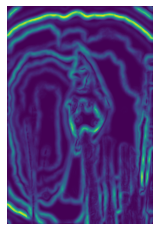

In [ ]:
#Gradient

texton_grad=[]
bright_grad=[]
color_grad=[]

for image in texton_map:
  texton_g = chi_square(image,HDL,HDR, 64)
  texton_grad.append(texton_g) 

for image in brightness_map:
  bright_g = chi_square(image,HDL,HDR, 16)
  bright_grad.append(bright_g)

for image in color_map:
  color_g = chi_square(image,HDL,HDR, 16)
  color_grad.append(color_g)

for i in range(len(texton_grad)):
  plt.imshow(texton_grad[i])
  plt.axis('off')
  # plt.show()
  plt.savefig('Tg_{}'.format(i+1)+ '.png')

for i in range(len(bright_grad)):
  plt.imshow(bright_grad[i])
  plt.axis('off')
  # plt.show()
  plt.savefig('Bg_{}'.format(i+1)+ '.png')

for i in range(len(color_grad)):
  plt.imshow(color_grad[i])
  plt.axis('off')
  # plt.show()
  plt.savefig('Cg_{}.png'.format(i+1))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

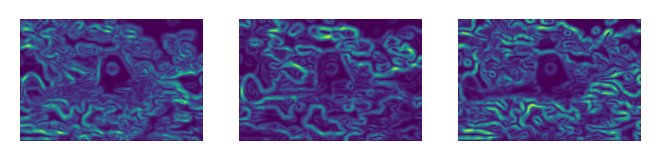

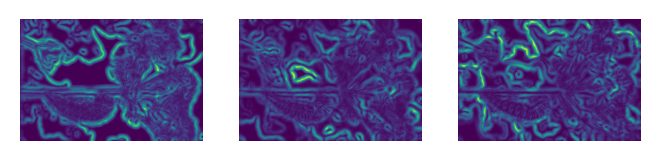

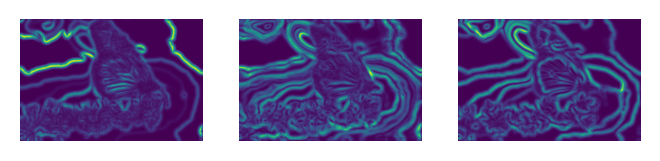

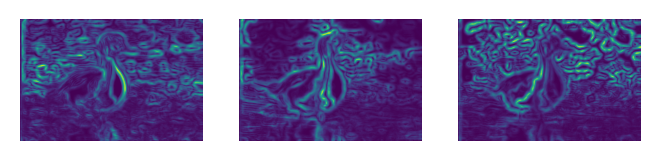

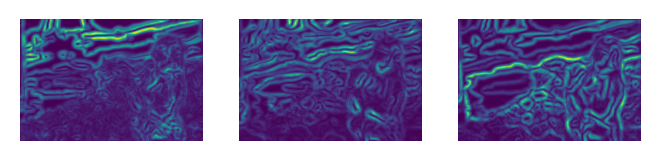

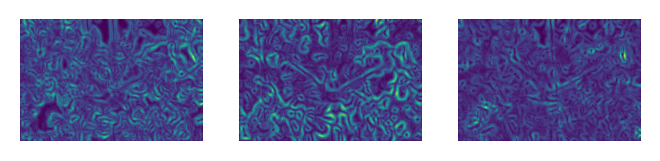

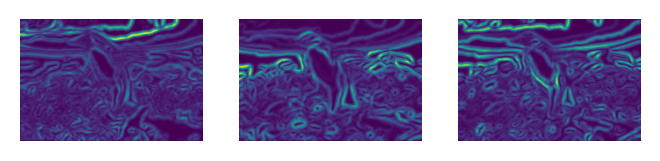

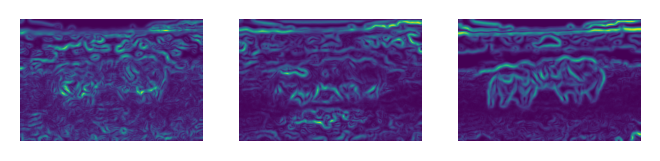

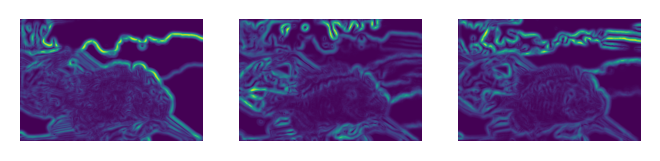

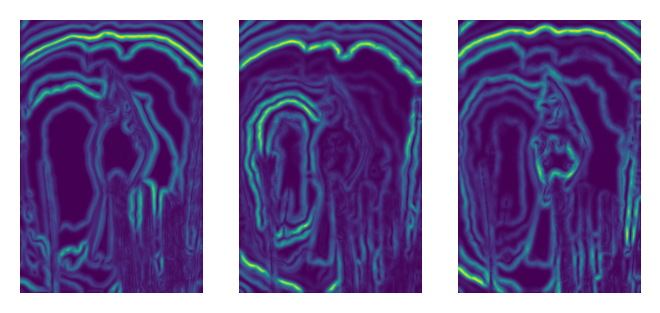

In [ ]:
# Gradient for all the images

for i in range(len(color_grad)):
  plt.figure(figsize=(4,4),dpi=200)
  plt.subplot(1,3,1)
  plt.axis('off')
  plt.imshow(texton_grad[i])
  plt.subplot(1,3,2)
  plt.axis('off')
  plt.imshow(bright_grad[i])
  plt.subplot(1,3,3)
  plt.axis('off')
  plt.imshow(color_grad[i])
  # plt.show()
  plt.savefig('Gradients_{}'.format(i+1)+ '.png')




1. Read Sobel Baseline
2. use command "cv2.imread(...)"


In [ ]:
sobelbaseline = []
sobel_path = []
for i in range(10):
  sobel_path.append("/content/data/SobelBaseline/"+str(i+1)+".png")
for n in sobel_path:
    image_S = cv2.imread(n)
    sobelbaseline.append(image_S)
# for m in range(10):
#     plt.imshow(sobelbaseline[m])
    # plt.show()




1. Read Canny Baseline
2. use command "cv2.imread(...)"



In [ ]:
cannybaseline = []
canny_path = []
for i in range(10):
  canny_path.append("/content/data/CannyBaseline/"+str(i+1)+".png")
for n in canny_path:
    image_C = cv2.imread(n)
    cannybaseline.append(image_C)
# for m in range(10):
    # plt.imshow(cannybaseline[m])
    # plt.show()



1. Combine responses to get pb-lite output
2. Display PbLite and save image as PbLite_ImageName.png
3. use command "cv2.imwrite(...)"



In [ ]:
#Combine responses to get pb-lite output

def Pb_edge(Tg,Bg,Cg,canny,sobel,w):
  w1=w
  w2=1-w1
  canny = cv2.cvtColor(canny, cv2.COLOR_BGR2GRAY)
  sobel = cv2.cvtColor(sobel, cv2.COLOR_BGR2GRAY)
  a= (Tg + Bg + Cg)/3
  a = a - np.ones(a.shape)*np.min(a)
  b= (w1 * canny) + (w2 * sobel)
  Pb_edge=np.multiply(a, b)
  return normalize(Pb_edge)


10


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

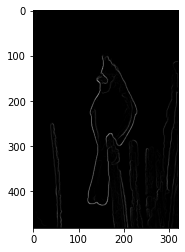

In [ ]:
Output=[]
print(len(in_imageslist))
for i in range(len(in_imageslist)):
  pb_lite_output =Pb_edge(texton_grad[i], bright_grad[i], color_grad[i],cannybaseline[i], sobelbaseline[i], 0.9)
  Output.append(pb_lite_output)
  # plt.figure(figsize=(20,20),dpi=80)
  plt.imshow(pb_lite_output, cmap = "gray")
  # plt.show()
  plt.savefig('PbLite_{}'.format(i+1)+ '.png')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

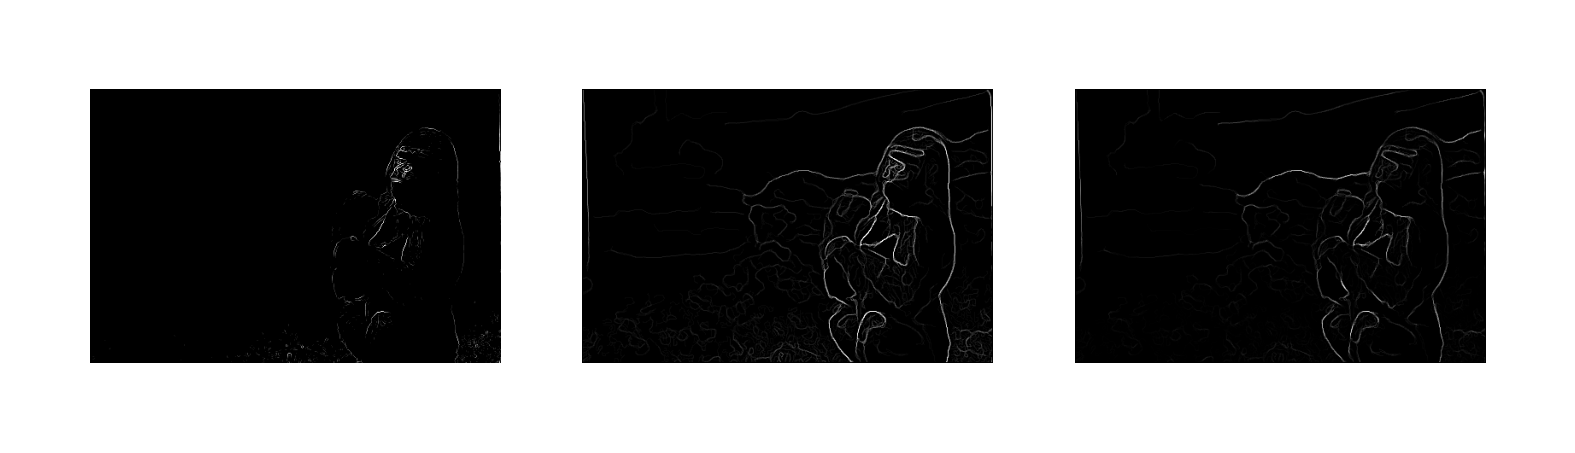

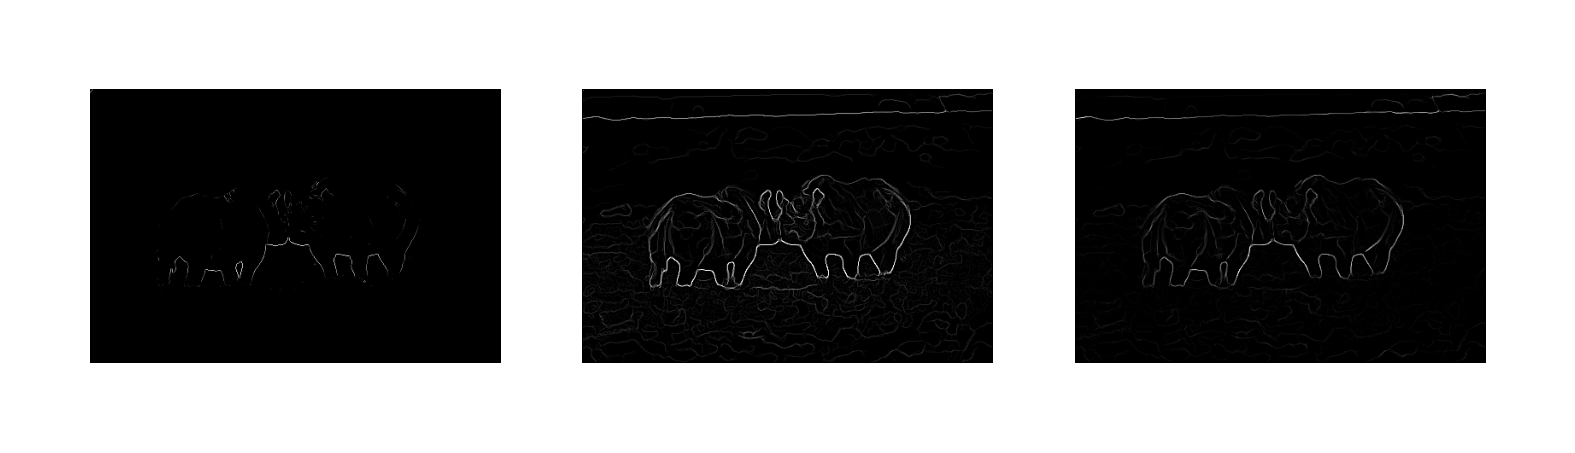

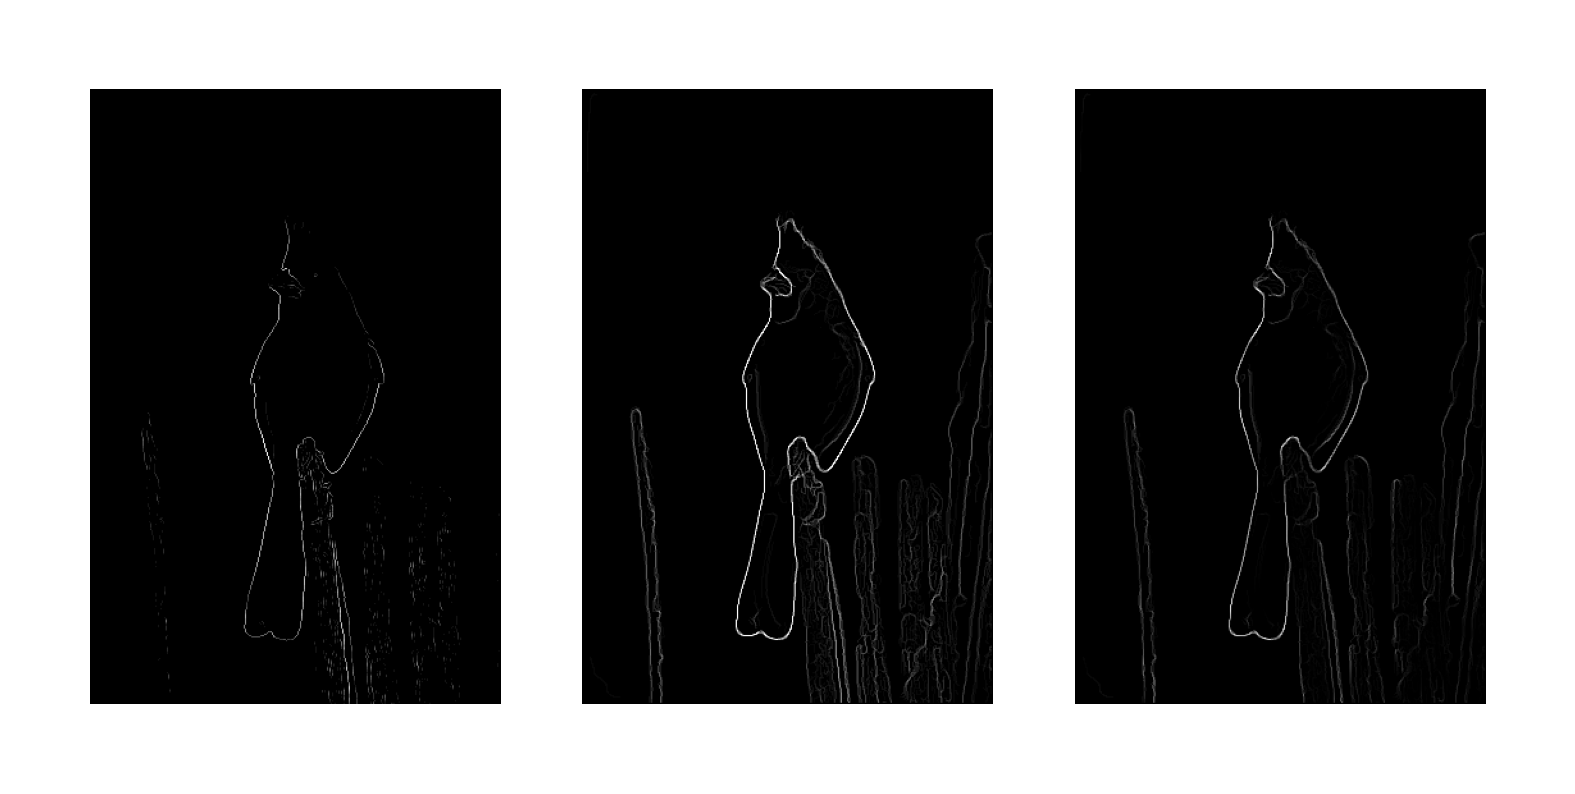

In [ ]:
for i in range(len(sobelbaseline)):
  plt.figure(figsize=(2,2),dpi=900)
  plt.subplot(1,3,1)
  plt.axis('off')
  plt.imshow(sobelbaseline[i])
  plt.subplot(1,3,2)
  plt.axis('off')
  plt.imshow(cannybaseline[i])
  plt.subplot(1,3,3)
  plt.axis('off')
  plt.imshow(normalize(Output[i]), cmap = "gray")
  # plt.show()
  plt.savefig('Analysis_{}'.format(i+1)+ '.png')
